In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
uji_dir = '../Dataset/Testing Kaggle'

uji_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

uji_generator = uji_datagen.flow_from_directory(uji_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical',
                                                shuffle=False)

Found 30 images belonging to 3 classes.


In [3]:
uji_generator.class_indices

{'Covid-19': 0, 'Normal': 1, 'Tuberkulosis': 2}

In [4]:
model = tf.keras.models.load_model('../Model/Model RSUP/model_C.h5')

In [5]:
# Use the model to predict on the testing data
prediksi = model.predict(uji_generator)
prediksi = np.argmax(prediksi, axis=1)

# Get the true labels from the generator
data_asli = uji_generator.classes

label_names = uji_generator.class_indices.keys()

1/1 [==============================] - 3s 3s/step


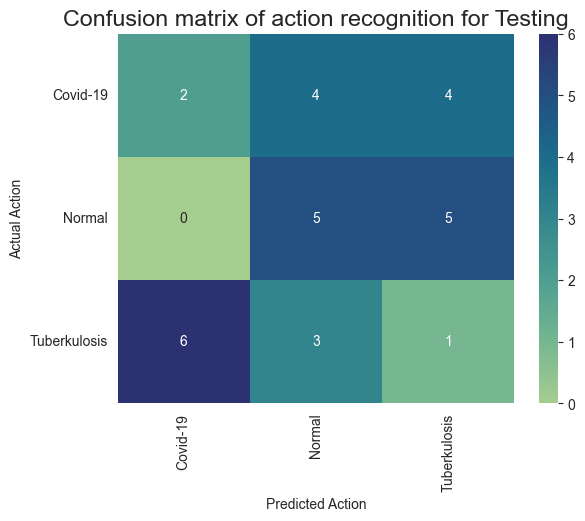

In [6]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g', cmap="crest")
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

plot_confusion_matrix(data_asli, prediksi, label_names, 'Testing')

In [7]:
def confusion_matrix(actual, predicted):
  cm = tf.math.confusion_matrix(actual, predicted)
  return cm

result = confusion_matrix(data_asli, prediksi)

In [8]:
# define the confusion matrix
conf_matrix = np.array(result)

# calculate true positives, true negatives, false positives, and false negatives
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# calculate accuracy, sensitivity, specificity, precision, and F1 score
accuracy = np.sum(TP) / np.sum(conf_matrix)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
F1 = 2 * precision * sensitivity / (precision + sensitivity)

# print the results
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 score:", F1)

Accuracy: 0.26666666666666666
Sensitivity: [0.2 0.5 0.1]
Specificity: [0.7  0.65 0.55]
Precision: [0.25       0.41666667 0.1       ]
F1 score: [0.22222222 0.45454545 0.1       ]
